In [4]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv('aug_train.csv')
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
13019,22053,city_40,0.776,NaN,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,never,125,0.0
17128,26977,city_24,0.698,Male,No relevent experience,Full time course,Graduate,STEM,9,NaN,NaN,never,5,0.0
7873,2871,city_67,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,4,10000+,Public Sector,3,11,1.0
14005,25593,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Early Stage Startup,1,54,0.0
15933,24271,city_16,0.910,Male,Has relevent experience,NaN,Masters,STEM,2,50-99,Early Stage Startup,1,174,1.0


# Descriptive Statistics

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? </br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?</br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?</br>
(min/mean/median/max/unique/top/freq)

In [6]:
#Basic information about the dataset
print("Basic information about the dataset")
print(df.info())

#Summary statistics
print("\nSummary Statistics")
print(df.describe())

#Check for missing values Percentage
print("\nMissing Values Percentage")
print(df.isna().sum()/len(df))

Basic information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes:

In [7]:
cats = ['enrollee_id','city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level','major_discipline','company_size', 
        'company_type','last_new_job']
nums = ['city_development_index','experience','training_hours','target']

print(df[cats].describe())
print("\n", df[nums].describe())


        enrollee_id
count  19158.000000
mean   16875.358179
std     9616.292592
min        1.000000
25%     8554.250000
50%    16982.500000
75%    25169.750000
max    33380.000000

        city_development_index  training_hours        target
count            19158.000000    19158.000000  19158.000000
mean                 0.828848       65.366896      0.249348
std                  0.123362       60.058462      0.432647
min                  0.448000        1.000000      0.000000
25%                  0.740000       23.000000      0.000000
50%                  0.903000       47.000000      0.000000
75%                  0.920000       88.000000      0.000000
max                  0.949000      336.000000      1.000000


#### A. Tipe data
1. 'enrollee_id' : bertipe int, akan diubah menjadi string</br>
2. 'city': dipisahkan string dengan nomornya, kemudian dijadikan integer </br>
3. 'city_development_index': sudah sesuai </br>
4. 'relevent_experience': diubah menjadi 1/0 </br>
5. 'enrolled_university': sudah sesuai (dapat diturunkan menjadi yes/no)</br>
6. 'education_level': sudah sesuai</br>
7. 'major_discipline': sudah sesuai </br>
8. 'experience': <1 diubah menjadi 0, >20 diubah menjadi 20. diubah menjadi integer. drop nilai yang kosong (0.33%)</br>
9. 'company_size': akan dibersihkan dan dikelompokkan menjadi 8 kelompok (<10, 10-49, 50-99, 100-500, 500-999, 1000-4999, 5000-999, >10000)</br>
10. 'company_type': sudah sesuai</br>
11. 'last_new_job': diubah menjadi integer, >4 menjadi 5</br>
12. 'training_hours': sudah sesuai</br>
13. 'target': diubah menjadi integer</br>

#### B. Kekosongan Data
Kolom Gender, Company size dan company type memiliki tingkat kekosongan data lebih dari 20%. Walaupun demikian akan tetap dipertahankan, karena mungkin memiliki insight menarik untuk analisa.

#### C. Data summary

In [8]:
df['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [9]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [10]:
#Mengubah tipe data pada kolom-kolom yang belum sesuai

#1 mengubah enrollee_id menjadi string
df['enrollee_id'] = df['enrollee_id'].astype(str)

#2
df['city']= df['city'].str.replace('city_','')

#3
df['relevent_experience'] = df['relevent_experience'].apply(lambda x: '1' if x=='Has relevent experience' else '0')

#4
df['experience'] = df['experience'].apply(lambda x: '0' if x=='<1' else x)
df['experience'] = df['experience'].apply(lambda x: '20' if x=='>20' else x)
df['experience'] = df['experience'].astype(float)


#5
#company_size': akan dibersihkan dan dikelompokkan menjadi 8 kelompok (<10, 10-49, 50-99, 100-500, 500-999, 1000-4999, 5000-999, 10000+)
df['company_size'] = df['company_size'].apply(lambda x: '10-49' if x=='10/49' else x)

#6
df['last_new_job'] = df['last_new_job'].apply(lambda x: '5' if x=='>4' else x)

#7
df['target'] = df['target'].astype(int)

#?? pertanyaan untuk kolom company size + last job, sebaiknya diapakan? dijadikan kategori?

In [11]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,1,no_enrollment,Graduate,STEM,20.0,NaN,NaN,1,36,1
1,29725,40,0.776,Male,0,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5,47,0
2,11561,21,0.624,NaN,0,Full time course,Graduate,STEM,5.0,NaN,NaN,never,83,0
3,33241,115,0.789,NaN,0,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,never,52,1
4,666,162,0.767,Male,1,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,Male,0,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,1,42,1
19154,31398,103,0.920,Male,1,no_enrollment,Graduate,STEM,14.0,NaN,NaN,4,52,1
19155,24576,103,0.920,Male,1,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,4,44,0
19156,5756,65,0.802,Male,1,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,2,97,0


#### Handling missing values

Missing Values Percentage</br>
gender                    0.235306 --> input 'unknown'</br>
enrolled_university       0.020148 --> drop </br>
education_level           0.024011 --> drop </br>
major_discipline          0.146832 --> input 'unknown</br>
experience                0.003393 --> drop </br>
company_size              0.309949 --> input '0'</br>
company_type              0.320493 --> input 'unknown'
last_new_job              0.022080 --> drop




In [12]:
df['company_size'].fillna('unknown',inplace=True)
df['company_type'].fillna('Unknown',inplace=True)
df['major_discipline'].fillna('Unknown',inplace=True)
df['gender'].fillna('Not provided',inplace=True)

In [13]:
df.dropna(inplace=True)
df.isna().sum()/len(df)

enrollee_id               0.0
city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
dtype: float64

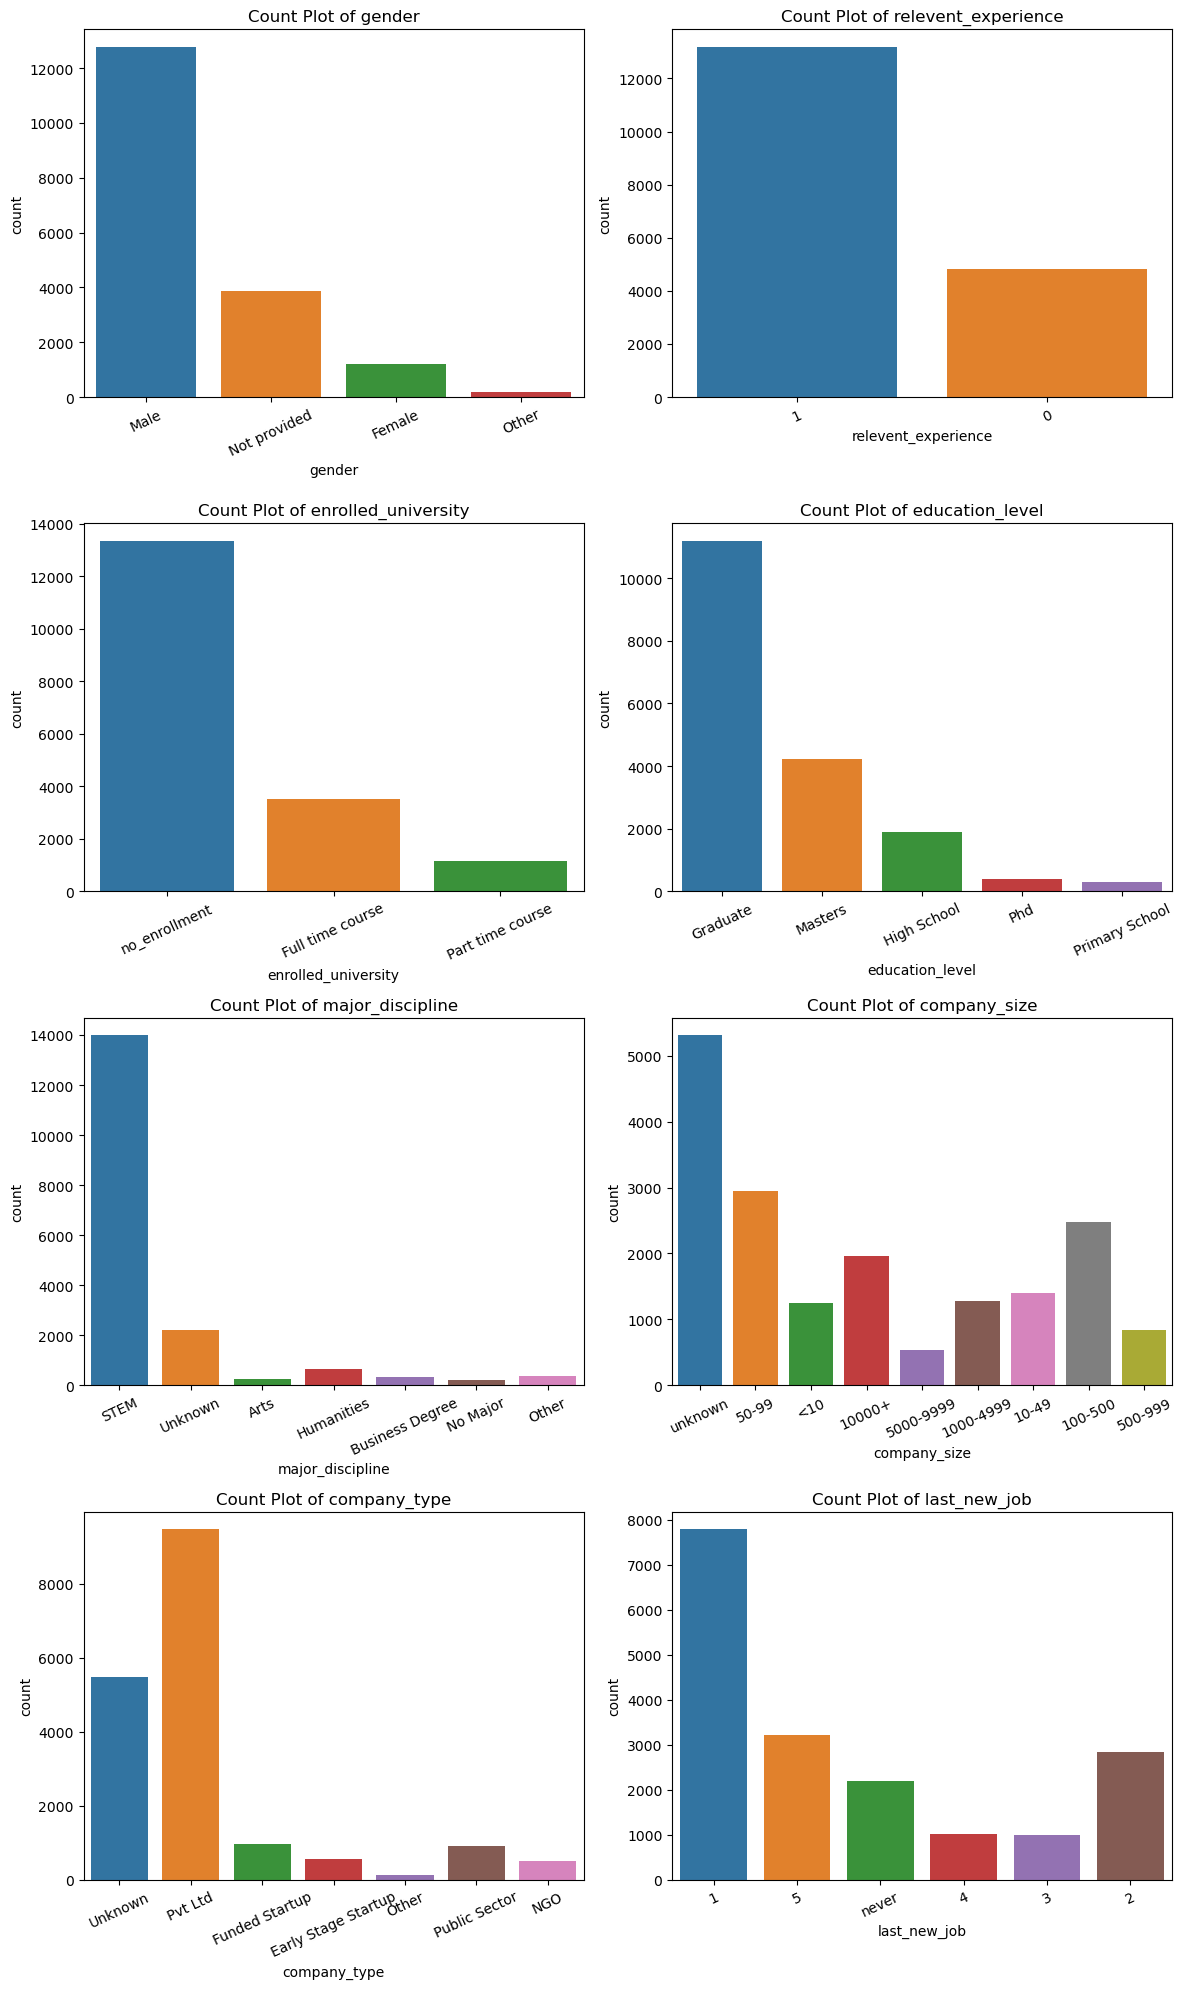

In [14]:
#Create count plots for categorical colums
cats1=['gender','relevent_experience', 'enrolled_university', 'education_level','major_discipline','company_size', 'company_type','last_new_job']
plt.figure(figsize=(12,20))
for i, col in enumerate(cats1, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation = 25)
plt.tight_layout()
plt.show()

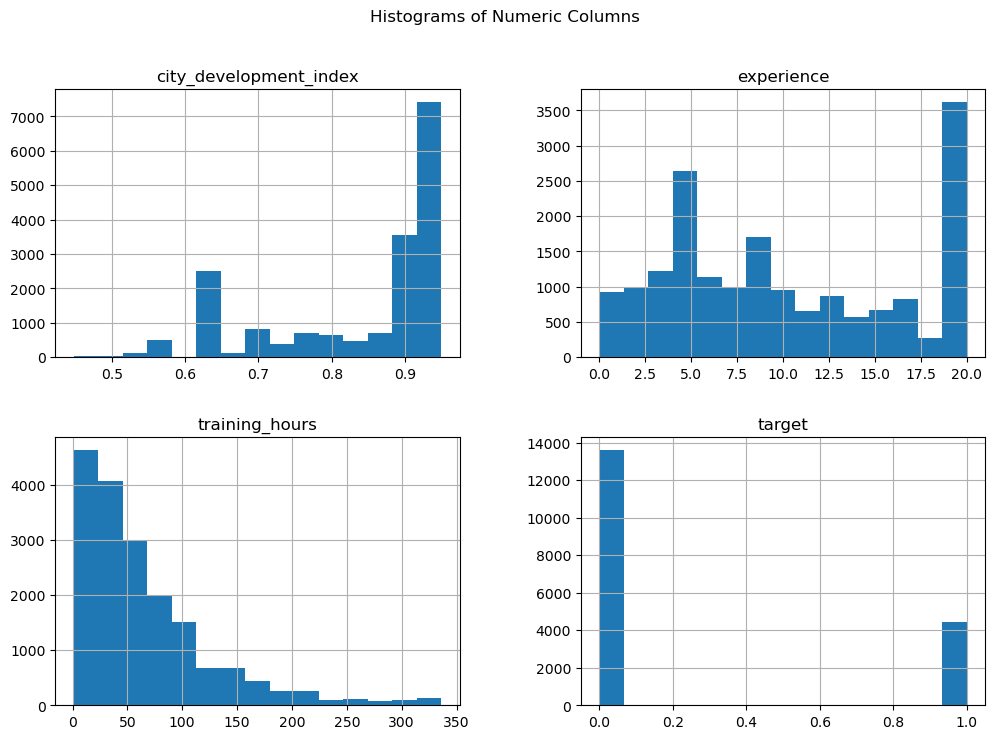

In [15]:
#Create histograms for numeric columns
df[nums].hist(bins=15, figsize=(12,8))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

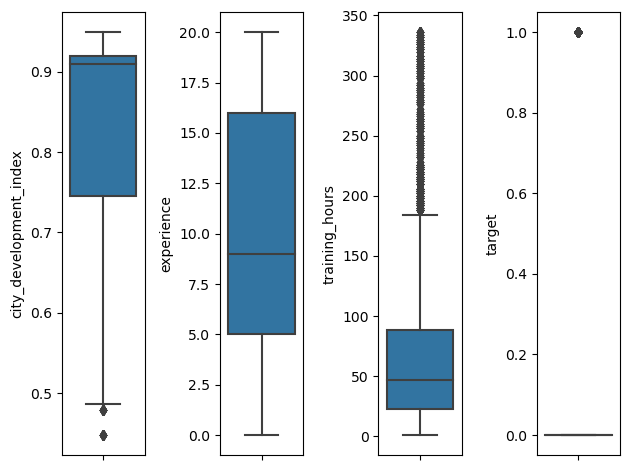

In [16]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

C:\Users\Pingkan Purwanto\AppData\Local\Temp\ipykernel_2068\3050400788.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

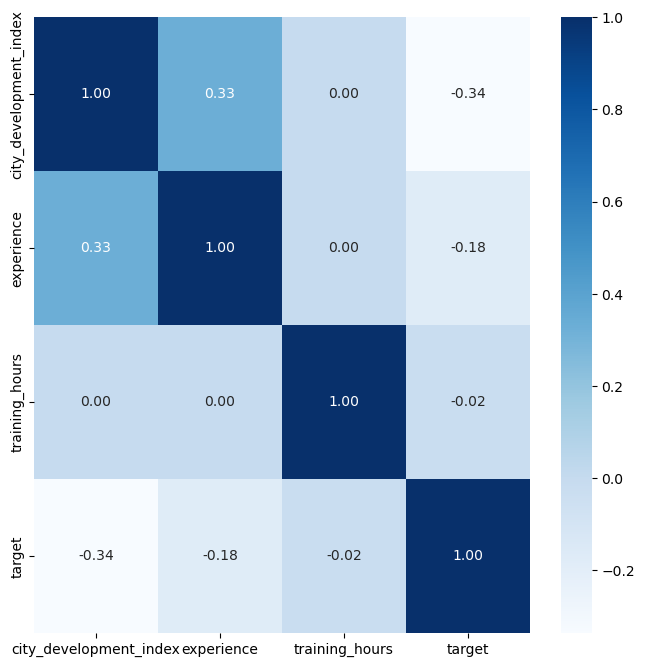

In [17]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [18]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
8409,19088,16,0.910,Not provided,1,no_enrollment,Graduate,STEM,4.0,50-99,Pvt Ltd,2,20,0
17139,24645,103,0.920,Male,0,Full time course,High School,Unknown,2.0,unknown,Unknown,never,57,0
18494,13308,21,0.624,Not provided,1,no_enrollment,Graduate,STEM,11.0,1000-4999,Pvt Ltd,1,25,1
3839,30989,103,0.920,Male,1,no_enrollment,Graduate,STEM,20.0,100-500,Public Sector,2,47,0
9316,4043,103,0.920,Male,1,no_enrollment,Graduate,STEM,3.0,1000-4999,Pvt Ltd,3,26,0


In [19]:
df.groupby(['target'])['enrollee_id'].aggregate('nunique').reset_index()

,target,enrollee_id
0,0,13593
1,1,4421


In [20]:
df.groupby(['target'])['training_hours','city_development_index', 'experience'].aggregate(['mean','median']).reset_index()

C:\Users\Pingkan Purwanto\AppData\Local\Temp\ipykernel_2068\4256069814.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['target'])['training_hours','city_development_index', 'experience'].aggregate(['mean','median']).reset_index()


target training_hours        city_development_index        experience       
                   mean median                   mean median       mean median
0      0      66.115942   47.0               0.855143  0.910  10.766718   10.0
1      1      62.986428   46.0               0.759734  0.754   8.073739    6.0

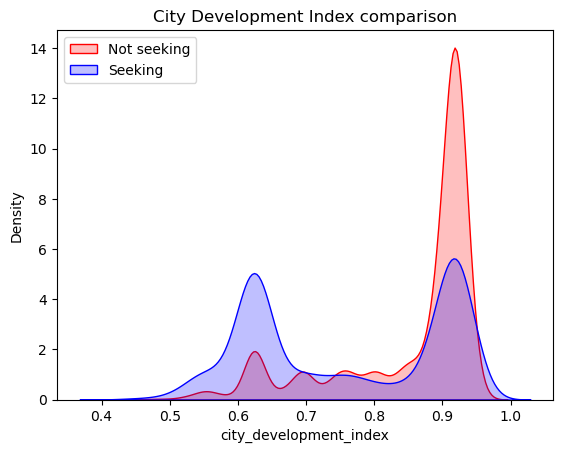

In [21]:
df0 = df[df['target']==0]
df1 = df[df['target']==1]

fig = sns.kdeplot(df0['city_development_index'] , fill=True, color="r")
fig = sns.kdeplot(df1['city_development_index'], fill=True, color="b")
plt.title('City Development Index comparison')
plt.legend(labels=('Not seeking','Seeking'), loc='upper left')
plt.show()

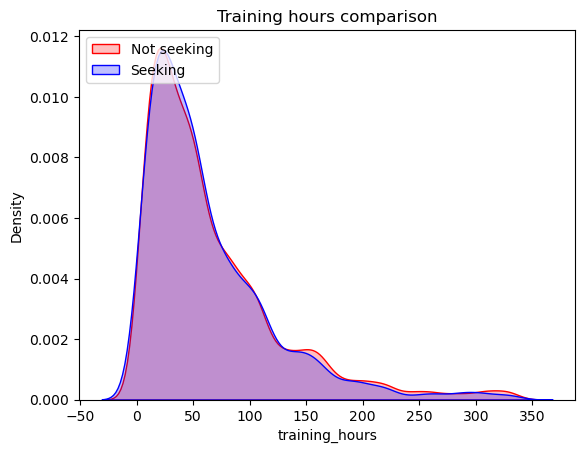

In [22]:
fig = sns.kdeplot(df0['training_hours'] , fill=True, color="r")
fig = sns.kdeplot(df1['training_hours'], fill=True, color="b")
plt.title('Training hours comparison')
plt.legend(labels=('Not seeking','Seeking'), loc='upper left')
plt.show()

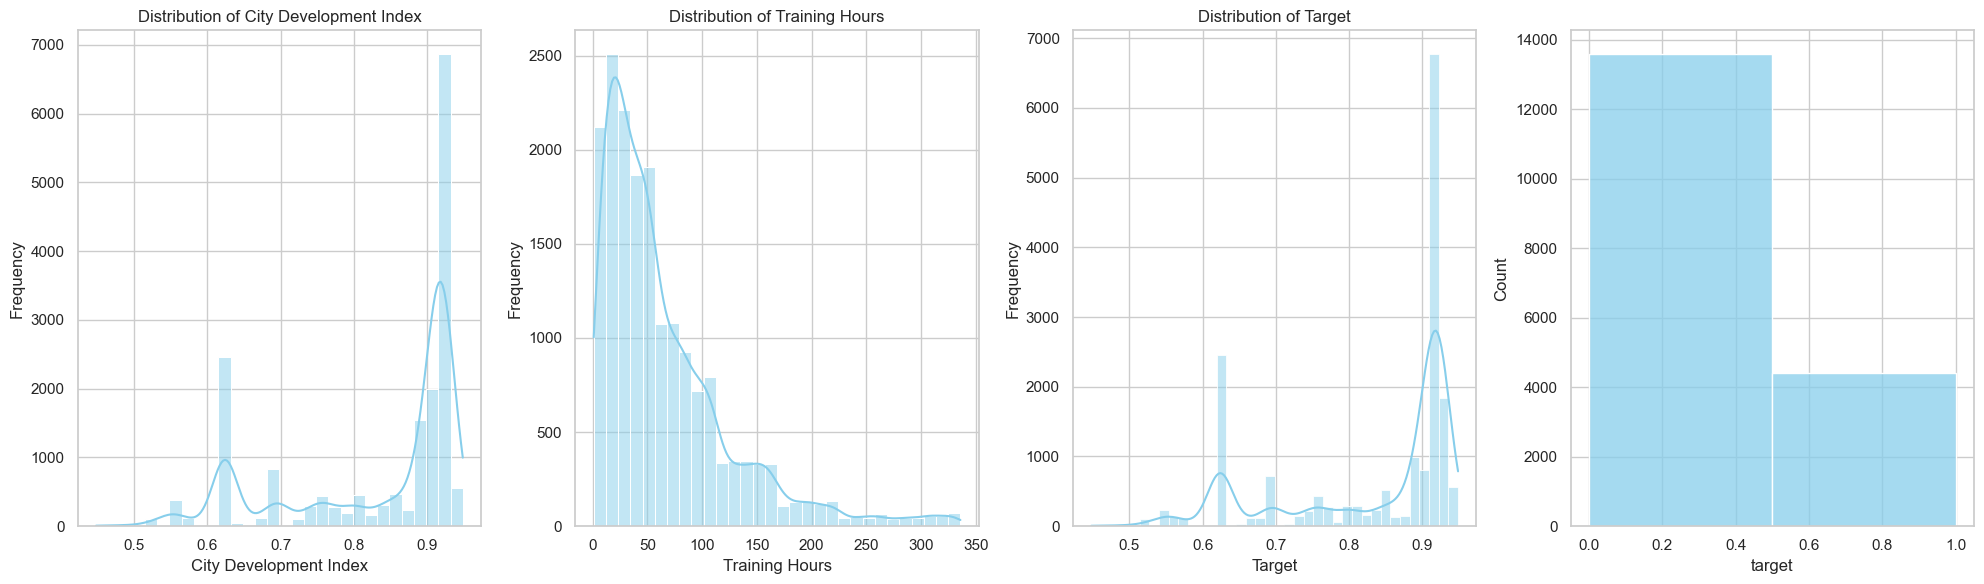

In [26]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 3, figsize=(20, 6))

sns.histplot(ax=axes[0], x=df['city_development_index'], bins=30, kde=True, color='skyblue')
axes[0].set_title('Distribution of City Development Index')
axes[0].set_xlabel('City Development Index')
axes[0].set_ylabel('Frequency')

sns.histplot(ax=axes[1], x=df['training_hours'], bins=30, kde=True, color='skyblue')
axes[1].set_title('Distribution of Training Hours')
axes[1].set_xlabel('Training Hours')
axes[1].set_ylabel('Frequency')

sns.histplot(ax=axes[2], x=df['city_development_index'], kde=True, color='skyblue')
axes[2].set_title('Distribution of CDI')
axes[2].set_xlabel('City Development Index')
axes[2].set_ylabel('Frequency')

sns.histplot(ax=axes[3], x=df['target'], bins=2, kde=False, color='skyblue')
axes[2].set_title('Distribution of Target')
axes[2].set_xlabel('Target')
axes[2].set_ylabel('Frequency')





plt.tight_layout()
plt.show()

C:\Users\Pingkan Purwanto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


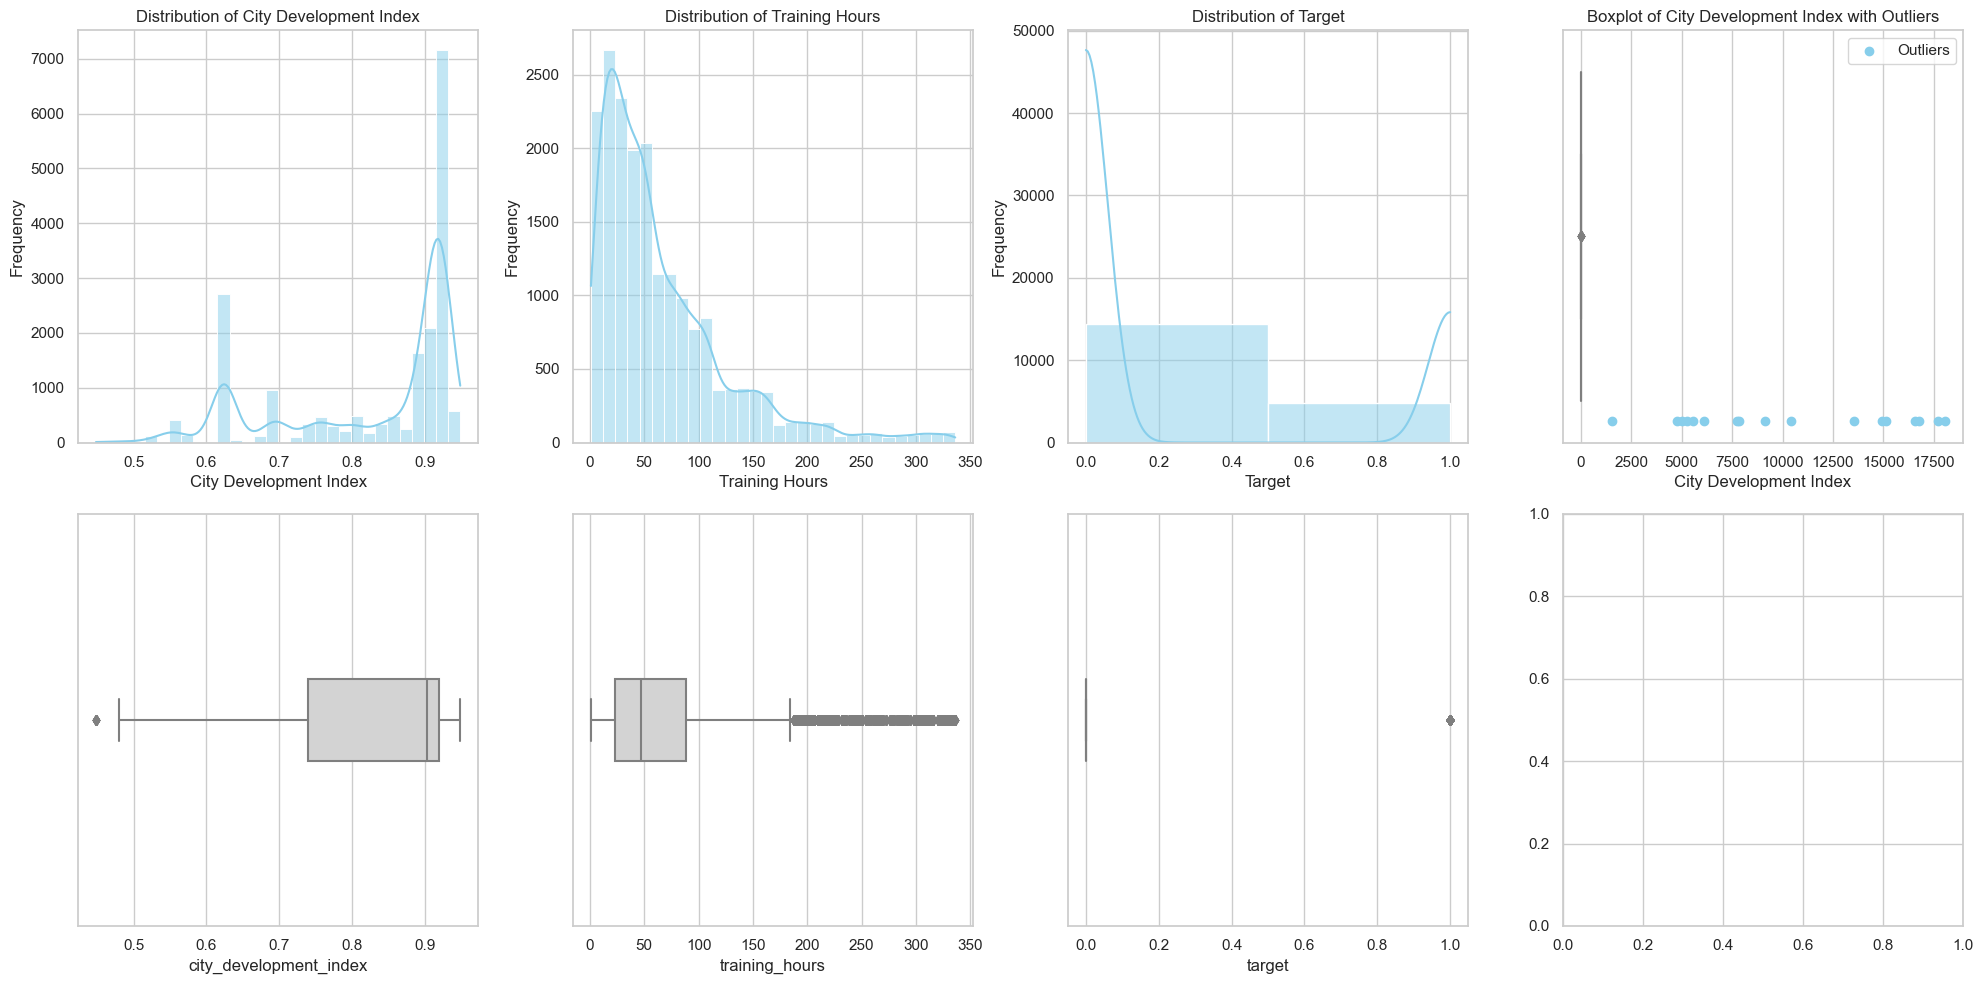

In [27]:
df_train = pd.read_csv('aug_train.csv')

sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

sns.histplot(ax=axes[0, 0], x=df_train['city_development_index'], bins=30, kde=True, color='skyblue')
axes[0, 0].set_title('Distribution of City Development Index')
axes[0, 0].set_xlabel('City Development Index')
axes[0, 0].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 0], x=df_train['city_development_index'], color='lightgrey', width=0.2)

sns.histplot(ax=axes[0, 1], x=df_train['training_hours'], bins=30, kde=True, color='skyblue')
axes[0, 1].set_title('Distribution of Training Hours')
axes[0, 1].set_xlabel('Training Hours')
axes[0, 1].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 1], x=df_train['training_hours'], color='lightgrey', width=0.2)

sns.histplot(ax=axes[0, 2], x=df_train['target'], bins=2, kde=True, color='skyblue')
axes[0, 2].set_title('Distribution of Target')
axes[0, 2].set_xlabel('Target')
axes[0, 2].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 2], x=df_train['target'], color='lightgrey', width=0.2)

Q1 = df_train['city_development_index'].quantile(0.25)
Q3 = df_train['city_development_index'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_train[(df_train['city_development_index'] < lower_bound) | (df_train['city_development_index'] > upper_bound)]

sns.boxplot(ax=axes[0, 3], x=df_train['city_development_index'], orient='vertical', color='lightgrey')
axes[0, 3].scatter(x=outliers.index, y=outliers['city_development_index'], color='skyblue', label='Outliers')
axes[0, 3].set_title('Boxplot of City Development Index with Outliers')
axes[0, 3].set_xlabel('City Development Index')
axes[0, 3].set_ylabel('')
axes[0, 3].legend()

plt.tight_layout()

plt.show()